# Job Posting Data Analysis
In this notebook, the group will be working with the [Job Posting in Singapore](https://www.kaggle.com/datasets/techsalerator/job-posting-data-in-singapore) dataset. This dataset will be used for processing, analyzing, and visualizing data.

This project is carried out by the group **DS NERDS**, under Section **S19**, which consists of the following members:
- Colobong, Franz Andrick
- Chu, Andre Benedict M. 
- Pineda, Mark Gabriel A.
- Rocha, Angelo H. 
  
The output fulfills a part of the requirements for the course Statistical Modeling and Simulation (CSMODEL). 


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
import json

**Modules Used:**

- `pandas`: Used for loading, manipulating, and analyzing tabular data.
- `numpy`: Provides numerical operations and support for handling arrays and missing values.
- `matplotlib.pyplot`: Used for creating basic plots and visualizations to explore data.
- `seaborn`: Builds on matplotlib to create more informative and visually appealing statistical graphics.
- `scipy` and `scipy.stats`: Used for performing statistical tests and calculations.
- `chi2_contingency` (from `scipy.stats`): Specifically used to perform the Chi-Square test of independence between categorical variables.
- `json`: Used for reading or handling data in JSON format, if applicable.


## Dataset Description and Collection Process

This dataset offers a comprehensive overview of job openings across various sectors in Singapore. It provides an essential resource for businesses, job seekers, and labor market analysts, and it can also be a valuable tool for people who would like to be informed about job openings and employment trends in Singapore.

The data was collected by a global data provider called **Techsalerator**, by consolidating and categorizing job-related information from diverse sources, including company websites, job boards, and recruitment agencies. 

Now, let us load the CSV file into our workspace with **'latin1'** encoding as it contains special characters (e.g., é, ñ, ’) that caused a UnicodeDecodeError with the default **'utf-8'** encoding.

In [2]:
job_posting_df = pd.read_csv('Job Posting.csv', encoding='latin1')
job_posting_df.head(5)

,Website Domain,Ticker,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,...,Description,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name
0,bosch.com,NaN,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-29T19:59:45Z,2024-07-31T14:35:44Z,"Indiana, United States","[{""city"":null,""state"":""Indiana"",""zip_code"":nul...","engineering, management, support",manager,...,**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T14:47:55Z,43-1011.00,Office and Administrative Support,First-Line Supervisors of Office and Administr...
1,bosch.com,NaN,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-04T01:00:12Z,2024-07-29T17:46:16Z,"Delaware, United States","[{""city"":null,""state"":""Delaware"",""zip_code"":nu...",internship,non_manager,...,**Professional Internship: Hardware Developmen...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","full time, internship, m/f",closed,en,2024-07-31T17:50:07Z,17-2061.00,Architecture and Engineering,Computer Hardware Engineers
2,zf.com,NaN,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,2024-04-19T06:47:24Z,2024-05-16T02:25:08Z,China,"[{""city"":null,""state"":null,""zip_code"":null,""co...",engineering,non_manager,...,ZF is a global technology company supplying sy...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",NaN,closed,en,2024-05-18T02:32:04Z,51-9141.00,Production,Semiconductor Processing Technicians
3,bosch.com,NaN,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-08-16T10:20:37Z,2024-08-22T11:14:49Z,Romania,"[{""city"":null,""state"":null,""zip_code"":null,""co...","information_technology, software_development",non_manager,...,**DevOps Developer with Python for ADAS Comput...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-23T00:33:30Z,15-1252.00,Computer and Mathematical,Software Developers
4,bosch.com,NaN,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-01T17:31:20Z,2024-08-01T05:11:33Z,India,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, sales",non_manager,...,**Senior Engineer Sales - Video Systems and So...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",full time,closed,en,2024-08-02T19:03:16Z,41-9031.00,Sales and Related,Sales Engineers


## Structure of the Data
In the dataset, there are 9919 rows and 21 columns. The rows reprent the total number of job postings entries, while the columns represent the attributes/variables gathered from these entries. The total number of observations is 9919 entries. These observations include the following: Website Domain, Ticker, Job Opening Title, Job Opening URL, First Seen At, Last Seen At, Location, Location Data, Category, Seniority, Keywords, Description, Salary, Salary Data, Contract Types, Job Status, Job Language, Job Last Processed At, O*NET Code, O*NET Family, O*NET Occupation Name.


In [3]:
job_posting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9919 entries, 0 to 9918
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Website Domain         9919 non-null   object 
 1   Ticker                 0 non-null      float64
 2   Job Opening Title      9919 non-null   object 
 3   Job Opening URL        9919 non-null   object 
 4   First Seen At          9919 non-null   object 
 5   Last Seen At           9919 non-null   object 
 6   Location               9508 non-null   object 
 7   Location Data          9919 non-null   object 
 8   Category               8250 non-null   object 
 9   Seniority              9919 non-null   object 
 10  Keywords               7646 non-null   object 
 11  Description            9807 non-null   object 
 12  Salary                 576 non-null    object 
 13  Salary Data            9919 non-null   object 
 14  Contract Types         8004 non-null   object 
 15  Job 

## Potential Implications of the Data
There are sevaral implications that can be gathered from this dataset. First and foremost, since the impact of AI has been more evident in the recent 5 years, analyzing the contents of this dataset can help us analyze what companies are currently looking for, especially when they are outsourcing to different countries. It helps us answer questions such as: 
- "Have companies started to hire less?" 
- "Are there more specialized skills being targeted" 
- "Are the more or less opportunities in different job fields?"
 
Second, this dataset will provide insights on key patterns and trends on the job market. It helps us identify what is happening in the various job fields as of 2024.
- "Is there a current downtrend or uptrend in regards with the job openings for specific industries?"
- "What are the possible forecastings we can achieve through these data?"
- "Are there enough entry-level positions opened? Are salaries enough for livable standareds"

The last and third point, is that job seekers can utilize the results of this analysis in understanding the current landscape of job industry. 
- "What are the current job fields that are opening more opportunities?"
- "What are the required skills for this type of job that a person wants?"
- "What do they need in order to get a livable or luxury type of wage?"

Of course, these questions are just examples of what the group is hoping to answer at the end of this notebook, there are many more questions that are still unexplored yet can provide impactful insights. 


## Key Data Fields 

This section provides a brief description of the key attributes present in the dataset:


- **Job Posting Date**: Captures the date a job is listed. This is crucial for job seekers and HR professionals to stay updated on the latest opportunities and trends.

- **Job Title**: Specifies the position being advertised. This helps in categorizing and filtering job openings based on industry roles and career interests.

- **Company Name**: Lists the hiring company. This information assists job seekers in targeting their applications and helps businesses track competitors and market trends.

- **Job Location**: Provides the job's geographic location within Singapore. Job seekers use this to find opportunities in specific areas, while employers analyze regional talent and market conditions.

- **Job Description**: Includes details about responsibilities, required qualifications, and other relevant aspects. This is vital for candidates to determine if they meet the requirements and for recruiters to communicate expectations clearly.

- **Contract Type**: Indicates the nature of employment (e.g., full-time, part-time, internship, contract). This helps applicants filter jobs based on their preferred working arrangement and helps analysts understand hiring trends.

- **O\*NET Family**: A standardized occupational classification that groups jobs into career fields. It enables high-level analysis across job domains and supports career exploration and workforce planning.

- **Salary Data**: Provides detailed information regarding the salary offered for the job. This allows individuals to understand earning potential, compare salaries across job roles or fields, and make more informed career or hiring decisions.



In [4]:
key_data_fields = job_posting_df[['First Seen At', 'Job Opening Title', 'Job Opening URL', 'Location', 'Description', 'Contract Types', 'O*NET Family', 'Salary Data']]
key_data_fields.head()

,First Seen At,Job Opening Title,Job Opening URL,Location,Description,Contract Types,O*NET Family,Salary Data
0,2024-05-29T19:59:45Z,IN_RBAI_Assistant Manager_Dispensing Process E...,https://jobs.smartrecruiters.com/BoschGroup/74...,"Indiana, United States",**IN\_RBAI\_Assistant Manager\_Dispensing Proc...,full time,Office and Administrative Support,"{""salary_low"":null,""salary_high"":null,""salary_..."
1,2024-05-04T01:00:12Z,Professional Internship: Hardware Development ...,https://jobs.smartrecruiters.com/BoschGroup/74...,"Delaware, United States",**Professional Internship: Hardware Developmen...,"full time, internship, m/f",Architecture and Engineering,"{""salary_low"":null,""salary_high"":null,""salary_..."
2,2024-04-19T06:47:24Z,Process Expert BMS Production,https://jobs.zf.com/job/Shenyang-Process-Exper...,China,ZF is a global technology company supplying sy...,NaN,Production,"{""salary_low"":null,""salary_high"":null,""salary_..."
3,2024-08-16T10:20:37Z,DevOps Developer with Python for ADAS Computin...,https://jobs.smartrecruiters.com/BoschGroup/74...,Romania,**DevOps Developer with Python for ADAS Comput...,full time,Computer and Mathematical,"{""salary_low"":null,""salary_high"":null,""salary_..."
4,2024-07-01T17:31:20Z,Senior Engineer Sales - Video Systems and Solu...,https://jobs.smartrecruiters.com/BoschGroup/74...,India,**Senior Engineer Sales - Video Systems and So...,full time,Sales and Related,"{""salary_low"":null,""salary_high"":null,""salary_..."


## Data Pre-Processing

Before diving into analysis, it's essential to **clean and standardize** the dataset to ensure accurate insights. In this section, we focus on preparing the data by addressing duplicates, handling missing values, correcting data types, and other data pre-processing techniques to improve data quality and ensure consistency throughout the analysis.

These steps help improve the **quality, reliability, and interpretability** of our exploratory data analysis (EDA) results.


### Remove Unnecessary Columns
Upon inspection, we can see that the **`Ticker`** column—referring to the stock ticker symbol of the company that posted the job—contains only null values.

Since this column provides no usable information for analysis or modeling, we can safely drop it from the dataset.


In [5]:
# Check the Ticker column
null_count = job_posting_df['Ticker'].isna().sum()
print("Unique Values:", job_posting_df['Ticker'].unique())
print(f"Number of null values: {null_count}")

# Drop the column
job_posting_df = job_posting_df.drop(columns=['Ticker'])

Unique Values: [nan]
Number of null values: 9919


### Remove Duplicate Job Postings

Duplicate job postings can occur when the same job is scraped or recorded multiple times. If left unaddressed, these duplicates can **bias statistical insights**, such as job availability by location or contract type. Removing them ensures each job posting is only counted once.

In [6]:
# Remove Duplicates
job_posting_df = job_posting_df.drop_duplicates()

### Remove Entries with Missing Critical Information

For the purpose of meaningful analysis, we remove records that lack crucial details such as:

- **Location** and **Location Data**: Essential for analyzing geographic trends.
- **Contract Type**: Helps determine the nature of the job, which is important for
categorizing roles.
- **Seniority**: Provides insight into job levels, which is useful for experience-based segmentation.
- **O\*NET Family**: Offers a standardized occupational classification, more reliable and structured than a free-text category.

Missing any of these fields makes the data point less useful and **hinders the development of valid hypotheses** during exploratory data analysis (EDA).

> **Note:** Although **`salary`** is a key field when evaluating job postings, it is excluded from the filtering process for now due to a high number of missing values. Removing those rows would also discard valuable data from other fields.



In [7]:
# Display the number of missing values in critical fields
print(job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']].isnull().sum())

# Show how many entries are missing any of the five critical fields
print(
    "Entries missing any of the critical fields:",
    job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']]
    .isnull().any(axis=1).sum(),
    "\n"
)

# Drop rows with any missing value in the critical columns
job_posting_df = job_posting_df.dropna(
    subset=['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family'],
    how='any'
)

# Re-check missing values after dropping
print(job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']].isnull().sum())
print(
    "Entries missing any of the critical fields after cleaning:",
    job_posting_df[['Location', 'Location Data', 'Contract Types', 'Seniority', 'O*NET Family']]
    .isnull().any(axis=1).sum()
)

Location           411
Location Data        0
Contract Types    1915
Seniority            0
O*NET Family         3
dtype: int64
Entries missing any of the critical fields: 2298 

Location          0
Location Data     0
Contract Types    0
Seniority         0
O*NET Family      0
dtype: int64
Entries missing any of the critical fields after cleaning: 0


### Fixing Incorrect Datatypes

To ensure that each column is using the **appropriate data type**, we begin by inspecting the current data types of all fields:


In [8]:
job_posting_df.dtypes

Website Domain           object
Job Opening Title        object
Job Opening URL          object
First Seen At            object
Last Seen At             object
Location                 object
Location Data            object
Category                 object
Seniority                object
Keywords                 object
Description              object
Salary                   object
Salary Data              object
Contract Types           object
Job Status               object
Job Language             object
Job Last Processed At    object
O*NET Code               object
O*NET Family             object
O*NET Occupation Name    object
dtype: object

Upon inspection, the **date fields** in the dataset are represented as generic `object` types. In this step, we convert them to their appropriate `datetime` data types and ensure they are consistently formatted.

To achieve this, we use the `pd.to_datetime()` method to parse each column. This allows us to catch any inconsistencies or formatting issues.

Any values that fail to convert (e.g., due to invalid formats or corrupted entries) are automatically set to `NaT` (*Not a Time*), enabling us to easily identify and count invalid or missing entries per column.


In [9]:
# Define the date columns to check
date_fields = ['First Seen At', 'Last Seen At', 'Job Last Processed At']
date_df = job_posting_df[date_fields].copy()

# Convert in-place and count invalid values
for col in date_fields:
    job_posting_df[col] = pd.to_datetime(job_posting_df[col], errors='coerce')
    invalid_count = job_posting_df[col].isna().sum()
    print(f"{invalid_count:,} invalid date value(s) found in '{col}'")

0 invalid date value(s) found in 'First Seen At'
0 invalid date value(s) found in 'Last Seen At'
0 invalid date value(s) found in 'Job Last Processed At'


In [10]:
job_posting_df.dtypes

Website Domain                        object
Job Opening Title                     object
Job Opening URL                       object
First Seen At            datetime64[ns, UTC]
Last Seen At             datetime64[ns, UTC]
Location                              object
Location Data                         object
Category                              object
Seniority                             object
Keywords                              object
Description                           object
Salary                                object
Salary Data                           object
Contract Types                        object
Job Status                            object
Job Language                          object
Job Last Processed At    datetime64[ns, UTC]
O*NET Code                            object
O*NET Family                          object
O*NET Occupation Name                 object
dtype: object

### Standardize Text Fields

To ensure consistency and simplify categorization, we clean key text fields by:

- **Removing leading and trailing spaces**
- **Converting all text to lowercase**

This helps avoid mismatches due to inconsistent casing (e.g., `"Full-Time"` vs `"full-time"`) or trailing whitespace (`"remote "` vs `"remote"`), especially when grouping or filtering values in analysis.

In [11]:
# Clean and standardize text-based columns
job_posting_df['O*NET Family'] = job_posting_df['O*NET Family'].str.strip().str.lower()
job_posting_df['Keywords'] = job_posting_df['Keywords'].str.strip().str.lower()
job_posting_df['Location'] = job_posting_df['Location'].str.strip().str.lower()
job_posting_df['Seniority'] = job_posting_df['Seniority'].str.strip().str.lower()
job_posting_df['Contract Types'] = job_posting_df['Contract Types'].str.strip().str.lower()

Now that all fields have been standardized to **consistent data types and formats**, we can proceed to the next step of the data pre-processing pipeline.


## Categorizing Data for Simplified Analysis

Many fields in the dataset, such as **`Seniority`**, **`Job Category`**, **`Location`**, **`Contract Types`**, and **`Skills`**, contain a wide variety of raw or inconsistent values. While these detailed values may be useful in certain cases, they can make analysis more difficult and less interpretable at a higher level.

To address this, we apply **categorization and grouping techniques** to simplify the data. By consolidating similar or related values into broader, standardized categories, we can make comparisons and aggregations more meaningful

As part of this process, we will import a custom module called `mapper.py`, which contains predefined functions for mapping and standardizing the values in each relevant column.

In [12]:
import mapper as mp

### Categorizing Data by Seniority

To simplify analysis based on job hierarchy, we categorize the `Seniority` field into broader groups. This allows us to analyze trends more effectively across different levels of responsibility.

We begin by inspecting the unique values in the `Seniority` column and then apply a mapping to group them into three categories:
- **Non-Managerial Position**
- **Managerial Position**
- **Executive Position**

To understand the mapping dictionary for seniority, refer to the `mapper.py` file, where it is defined under the variable `seniority_mapping`.


In [13]:
# Check all unique values
unique_values_seniority = job_posting_df['Seniority'].unique()
print(unique_values_seniority)

['manager' 'non_manager' 'director' 'head' 'vice_president' 'c_level'
 'partner' 'president']


In [14]:
# Map the values and count categories
seniority_categories = job_posting_df['Seniority'].map(mp.seniority_mapping)
seniority_category_counts = seniority_categories.value_counts().sort_index()

# Update the 'Seniority' column with the mapped categories
job_posting_df['Seniority'] = seniority_categories

print("=" * 50)
print(seniority_category_counts)
print("=" * 50)

Seniority
Executive Position           17
Managerial Position        1433
Non-Managerial Position    6171
Name: count, dtype: int64


### Categorizing Data by Job Field

The **job field** was categorized by analyzing the contents of the `O*NET Family` column, which provides more specific insights into the required skills, education, and training for each role. Compared to the `Category` column—which offers a broader and often more general classification—the `O*NET Family` column is a more suitable choice for identifying and analyzing job fields with greater precision.

The mapping logic for grouping related job fields is defined in the `mapper.py` file under the variable `job_fields_mappings`. Refer to that file to view how each O*NET Family is classified into a broader job field.


In [15]:
# Check all unique values
unique_job_fields = job_posting_df['O*NET Family'].unique()
print(unique_job_fields)

['office and administrative support' 'architecture and engineering'
 'computer and mathematical' 'sales and related'
 'installation, maintenance, and repair'
 'business and financial operations' 'production'
 'life, physical, and social science' 'management'
 'community and social service' 'transportation and material moving'
 'healthcare practitioners and technical' 'personal care and service'
 'educational instruction and library' 'construction and extraction'
 'arts, design, entertainment, sports, and media'
 'food preparation and serving related' 'protective service'
 'military specific' 'legal' 'healthcare support'
 'farming, fishing, and forestry'
 'building and grounds cleaning and maintenance']


In [16]:
# Map the values and get the count of the categories
job_fields_categories = job_posting_df['O*NET Family'].map(mp.job_fields_mapping)
job_fields_category_counts = job_fields_categories.value_counts().sort_index()

# Update the 'O*Net' column with the mapped categories
job_posting_df['O*NET Family'] = job_fields_categories

print("=" * 50)
print(job_fields_category_counts)
print("=" * 50)

O*NET Family
Agriculture and Natural Resources       12
Business and Administration           2861
Education                              247
Engineering and Construction          1202
Facilities Management and Services     285
Government and Public Safety            53
Healthcare                             238
Legal Services                          18
Manufacturing                          669
Multimedia and Sports                   84
Public Service                          33
Science and Research                   269
Technology                            1342
Transportation and Logistics           308
Name: count, dtype: int64


### Categorizing Data by Contract Types

To streamline analysis of employment structures, we categorize the values in the `Contract Types` column. This involves identifying all unique contract types present in the dataset and mapping them to broader, standardized categories.

The mapping logic is defined in the `mapper.py` file under the variable `contract_type_mapping`.


In [17]:
split_contract_types = job_posting_df['Contract Types'].str.split(',').explode()

unique_ctypes = split_contract_types.str.strip().unique()

print(unique_ctypes)

['full time' 'internship' 'm/f' 'intern' 'tempo integral' 'onsite'
 'hybrid' 'remote' '3rd shift' 'long term' 'short term' 'part time'
 'vollzeit' 'm/w' 'permanent' 'temporary' 'contractor' 'fully remote'
 'contract' 'all levels' 'commission' 'summer' 'festanstellung'
 'work from home' 'vaste aanstelling' 'trabalho remoto' 'trainee'
 'practitioner' 'fuldtid' 'pe_ny etat' 'temps plein' 'day shift'
 'night shift' 'full or part time' 'teletrabajo' 'day time' 'm f' 'deltid'
 'nuit' 'temps partiel' 'freelance' 'tempo indeterminato']


In [18]:
# Lowercase the keys for consistent matching
mapping_ctypes_lower = {k.lower(): v for k, v in mp.contract_types_mapping.items()}

def map_ctypes_in_cell(str_keywords):
    if pd.isna(str_keywords):
        return []

    str_keywords = str_keywords.lower()
    mapped_categories = [
        category for keyword, category in mapping_ctypes_lower.items()
        if keyword in str_keywords
    ]

    return mapped_categories

# Map contract types using the function
contract_type_categories = job_posting_df['Contract Types'].map(map_ctypes_in_cell)

# Count occurrences (flatten list with explode)
contract_type_counts = contract_type_categories.explode().value_counts().sort_index()

# Update the 'Contract Types' column with the mapped categories
job_posting_df['Contract Types'] = contract_type_categories

# Display the results
print("=" * 50)
print(contract_type_counts)
print("=" * 50)

Contract Types
All Levels             284
Commission             108
Contract/Temporary     409
Day Time                 2
Full Time             4810
Full or Part Time        2
Hybrid                 874
Internship/Trainee    1666
Long Term              372
Male/Female            686
Monday-Friday            1
Night                    1
On-site                206
Part Time              215
Permanent              249
Remote/Flexible        445
Shift Work               6
Short Term              59
Name: count, dtype: int64


### Categorizing Data by Keywords

The `Keywords` column often contains multiple entries separated by commas. To ensure accurate grouping and analysis, we first clean and split these entries into individual keywords. This helps reduce redundancy caused by inconsistent formatting (e.g., extra spaces, mixed casing).

After cleaning, we identify all unique keyword values and apply standardized categorization where needed. This step supports clearer interpretation of skillsets or role-related descriptors associated with each job posting.

The logic for processing and mapping keyword values is handled in the `mapper.py` file under the relevant keyword-related functions or mappings.

In [19]:
# Split the contents of the keywords column
split_keywords = job_posting_df['Keywords'].str.split(',').explode()

# Then find the unique values, these mitigates redundancy a lot
unique_keywords = split_keywords.str.strip().unique()

print(unique_keywords)

[nan 'scrum' 'github' 'jenkins' 'growth' 'c++' 'linux' 'python'
 'microsoft azure' 'docker' 'business development' 'internship'
 'ecommerce' 'sap successfactors' 'e-commerce' 'servicenow' 'microsoft'
 'sap' 'cognex' 'omron' 'call center' 'hris' 'salesforce' 'social media'
 'customer success' 'contentful' 'gainsight' 'facebook' 'linkedin'
 'agorapulse' 'teamtailor' '.net' 'c#' 'angular' 'android' 'java' 'gerrit'
 'kotlin' 'power bi' 'keyence' 'bmc remedy' 'databricks'
 'azure databricks' 'microsoft excel' 'microsoft teams' 'simulink' 'novi'
 'kanban' 'real estate' 'microsoft word' 'sap s/4hana' 'informatica'
 'atlassian' 'atlassian jira' 'splunk' 'matlab' 'selenium' 'gradle'
 'postman' 'javascript' 'successfactors' 'qualtrics' 'microsoft 365'
 'contractor' 'branding' 'outbound' 'glassdoor' 'websocket' 'sigfox'
 'json' 'django' 'ansible' 'kubernetes' 'marketing campaigns' 'front-end'
 'back-end' 'angularjs' 'node.js' 'php' 'ruby' 'gatsby' 'graphql' 'remix'
 'informa' 'hubspot' 'microsoft

The `Keywords` column contained over **500+ unique values**, many of which represented similar or related concepts. To reduce redundancy and make analysis more manageable, the values were **grouped into broader categories** such as *Programming Languages*, *Frameworks & Libraries*, *Tools & Platforms*, and others.

In [20]:
# Lowercase the keys for case-insensitive lookups
mapping_skills_lower = {k.lower(): v for k, v in mp.keywords_skills_mapping.items()}

def map_keywords_in_cell(str_keywords):
    if pd.isna(str_keywords):
        return []

    str_keywords = str_keywords.lower()
    mapped_categories = [
        category for keyword, category in mapping_skills_lower.items()
        if keyword in str_keywords
    ]

    return mapped_categories

# Map keywords to categories
keyword_categories = job_posting_df['Keywords'].map(map_keywords_in_cell)

# Count the occurrences (flatten the lists)
keyword_category_counts = keyword_categories.explode().value_counts().sort_index()

# Update the 'Keywords' column with the mapped categories
job_posting_df['Keywords'] = keyword_categories

# Display the results
print("=" * 50)
print(keyword_category_counts)
print("=" * 50)

Keywords
Analytics & BI                     576
CMS & Web Platforms                368
CRM                                215
Cloud Services                     590
Databases                          255
Design Tools                       196
DevOps & CI/CD                     613
ERP & Business Software           4774
Frameworks & Libraries             886
Hardware                           117
Marketing & Social Media Tools     916
Methodologies                     1460
Networking & Security              127
Operating Systems                  262
Other and Broader Skills          1732
Programming Languages             5260
Project Management                 214
Tools & Platforms                  504
Tools and Platforms                 76
Name: count, dtype: int64


### Parsing and Analyzing Location Data

To extract meaningful insights from the `Location Data` column, we begin by parsing its contents—originally stored in JSON-like strings—into structured dictionaries. We begin by creating a copy of the main dataset into `locations_df` to avoid modifying the original `job_posting_df`.

In [21]:
locations_df = job_posting_df.copy()

# Check the contents of the Location Data
locations_df['Location Data']

0       [{"city":null,"state":"Indiana","zip_code":nul...
1       [{"city":null,"state":"Delaware","zip_code":nu...
3       [{"city":null,"state":null,"zip_code":null,"co...
4       [{"city":null,"state":null,"zip_code":null,"co...
5       [{"city":"Yokohama","state":null,"zip_code":nu...
                              ...                        
9914    [{"city":"Charleston","state":"South Carolina"...
9915    [{"city":null,"state":"Indiana","zip_code":nul...
9916    [{"city":null,"state":null,"zip_code":null,"co...
9917    [{"city":"Aveiro","state":null,"zip_code":null...
9918    [{"city":"Jiaxing","state":null,"zip_code":nul...
Name: Location Data, Length: 7621, dtype: object

This section focuses on extracting structured information from the `Location Data` column, which contains location details in JSON format. Each entry is parsed into a Python dictionary using a custom `parse_location()` function. This function handles both single dictionary entries and lists of dictionaries, returning a standardized format for further processing.

After parsing, the `json_normalize()` method is used to flatten the nested data structure, transforming the location attributes (such as `city`, `region`, and `country`) into separate columns. This results in a cleaner and more analyzable format, allowing us to explore geographic distributions—such as the number of job postings per country.


In [22]:
# Parse data into a dictionary
def parse_location(str_location):
    try:
        # Convert the json file into a python object
        data = json.loads(str_location)

        # Takes the first element: if a list, else returns the dictionary as the 
        # first element, otherwise return the dictionary
        return data[0] if isinstance(data, list) else data
    except:
        # Return an empty list
        return {}

# Parse the location data  
locations_df['Location Data'] = locations_df['Location Data'].apply(
    parse_location
)

locations_df = locations_df['Location Data'].apply(pd.Series)
locations_df

,city,state,zip_code,country,region,continent,fuzzy_match
0,None,Indiana,None,United States,None,None,False
1,None,Delaware,None,United States,None,None,False
3,None,None,None,Romania,None,None,False
4,None,None,None,India,None,None,False
5,Yokohama,None,None,Japan,None,None,False
...,...,...,...,...,...,...,...
9914,Charleston,South Carolina,None,United States,None,None,False
9915,None,Indiana,None,United States,None,None,False
9916,None,None,None,Serbia,None,None,False
9917,Aveiro,None,None,Portugal,None,None,False


In [23]:
# Display the contents by categorizing the total number of entries per country
locations_df['country'].value_counts()

country
United States           2386
India                   1028
Germany                  964
Brazil                   299
Mexico                   295
Portugal                 294
Hungary                  261
Poland                   256
Turkey                   157
Japan                    156
Romania                  147
China                    119
Spain                    108
Malaysia                 103
United Kingdom            96
Czechia                   87
Austria                   85
Serbia                    70
Belgium                   61
Denmark                   56
Slovenia                  52
France                    49
Vietnam                   49
Netherlands               44
Thailand                  41
Colombia                  38
Australia                 32
Ireland                   27
Slovakia                  25
Italy                     24
Morocco                   20
Switzerland               16
Egypt                     14
Argentina                 11
Canada

### Salary Data Extraction and Preparation

To better understand the **`Salary Data`** column, we begin by creating a separate copy of the original DataFrame called `salary_df`. This ensures that all salary-related transformations and cleaning steps can be performed safely without altering the original `job_posting_df`. 

In [24]:
salary_df = job_posting_df.copy()
salary_df['Salary Data']


0       {"salary_low":null,"salary_high":null,"salary_...
1       {"salary_low":null,"salary_high":null,"salary_...
3       {"salary_low":null,"salary_high":null,"salary_...
4       {"salary_low":null,"salary_high":null,"salary_...
5       {"salary_low":null,"salary_high":null,"salary_...
                              ...                        
9914    {"salary_low":null,"salary_high":null,"salary_...
9915    {"salary_low":null,"salary_high":null,"salary_...
9916    {"salary_low":null,"salary_high":null,"salary_...
9917    {"salary_low":null,"salary_high":null,"salary_...
9918    {"salary_low":null,"salary_high":null,"salary_...
Name: Salary Data, Length: 7621, dtype: object

Upon inspection, we notice that the salary descriptions are stored as **JSON objects**—but currently in the form of **JSON strings**.

To make this data usable, we will:

1. **Parse** each string into a Python dictionary.
2. **Normalize** the dictionary so that each key becomes its own separate column in the DataFrame.

This will give us a clearer structure, allowing us to inspect and clean salary values more effectively.


In [25]:
salary_df = job_posting_df.copy()

# Parse json object into a dictionary
salary_df['Salary Data'] = salary_df['Salary Data'].apply(
    lambda x: json.loads(x) if isinstance(x, str) else x
)

# Normalize Salary Data into new columns
salary_df = pd.json_normalize(salary_df['Salary Data'])
salary_df

,salary_low,salary_high,salary_currency,salary_low_usd,salary_high_usd,salary_time_unit
0,NaN,NaN,None,NaN,NaN,None
1,NaN,NaN,None,NaN,NaN,None
2,NaN,NaN,None,NaN,NaN,None
3,NaN,NaN,None,NaN,NaN,None
4,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...
7616,NaN,NaN,None,NaN,NaN,None
7617,NaN,NaN,None,NaN,NaN,None
7618,NaN,NaN,None,NaN,NaN,None
7619,NaN,NaN,None,NaN,NaN,None


By running `salary_df.info()`, we can observe that out of thousands of job postings, only **434** entries contain salary-related information. 

Since salary is a critical detail when analyzing job data, we want to ensure our next steps focus only on entries where salary is provided. To simplify our cleaning process, we will **temporarily drop rows with null values** for salary-related fields.


In [26]:
salary_df.info() 

# Drop rows with any null values
salary_df.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7621 entries, 0 to 7620
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   salary_low        408 non-null    float64
 1   salary_high       408 non-null    float64
 2   salary_currency   408 non-null    object 
 3   salary_low_usd    408 non-null    float64
 4   salary_high_usd   408 non-null    float64
 5   salary_time_unit  408 non-null    object 
dtypes: float64(4), object(2)
memory usage: 357.4+ KB


Now that we've removed rows with null values, we can inspect the unique values present in each field. 

In particular, the **`salary_currency`** column contains two distinct values: **USD** and **EUR**.


In [27]:
salary_df['salary_currency'].value_counts()

salary_currency
USD    289
EUR    119
Name: count, dtype: int64

After checking the `salary_currency` field, we observe that most job salaries are already in **USD**. 

To ensure consistency in our analysis, we will normalize the data by converting all **EUR** salaries to **USD** using the exchange rate as of **June 22, 2025**:

- **1 EUR = 1.15 USD**

This conversion allows us to compare salaries more accurately and ensures uniformity across the dataset.


In [28]:
# Define conversion rate from EUR to USD
conversion_rate = 1.15

# Convert EUR to USD
for index, row in salary_df.iterrows():
    if row['salary_currency'] == 'EUR':
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * conversion_rate
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * conversion_rate
        salary_df.loc[index, 'salary_currency'] = 'USD'

# Drop redundant salary column 
salary_df.drop(columns=['salary_low_usd', 'salary_high_usd'], inplace=True, errors='ignore')

salary_df

,salary_low,salary_high,salary_currency,salary_time_unit
24,49.45,49.45,USD,hour
26,34437.90,34437.90,USD,year
124,171000.00,190000.00,USD,year
133,19.50,19.50,USD,hour
162,234062.00,245000.00,USD,year
...,...,...,...,...
7392,70000.00,86300.00,USD,year
7393,1087.90,1087.90,USD,month
7416,43.00,66.00,USD,hour
7501,16.50,16.50,USD,hour


Now that all the salaries are represented in **USD**, we can focus on the `salary_time_unit` column, which is categorized into three values: **hour**, **month**, and **year**. These indicate how each salary is paid.

In [29]:
salary_df['salary_time_unit'].value_counts()

salary_time_unit
year     234
hour     126
month     48
Name: count, dtype: int64

We notice that most salaries are already given on an **annual basis**. To maintain consistency and enable easier comparisons, we will convert all salaries to **annual salary**.

#### Conversion Formulas:
- **Monthly to Annual**:
  - `annual_salary = monthly_salary * 12`

- **Hourly to Annual** (assuming a standard 9-to-5 schedule):
  - `hours_per_week = 40`
  - `weeks_per_year = 52`
  - `hourly_to_annual = 40 * 52 = 2080`

In [30]:
# Conversion factors
monthly_to_annual = 12
hours_per_week = 40
weeks_per_year = 52
hourly_to_annual = hours_per_week * weeks_per_year  # 40 * 52 = 2080

for index, row in salary_df.iterrows():
    # Convert hourly salaries to annual
    if (row['salary_time_unit'] == 'hour'):
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * hourly_to_annual
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * hourly_to_annual
        salary_df.loc[index, 'salary_time_unit'] = 'year'
    
    # Convert monthly salaries to annual
    elif (row['salary_time_unit'] == 'month'):
        salary_df.loc[index, 'salary_low'] = row['salary_low'] * monthly_to_annual
        salary_df.loc[index, 'salary_high'] = row['salary_high'] * monthly_to_annual
        salary_df.loc[index, 'salary_time_unit'] = 'year'

    # Retain annual salaries
    else:
        salary_df.loc[index, 'salary_low'] = row['salary_low']
        salary_df.loc[index, 'salary_high'] = row['salary_high']

salary_df


,salary_low,salary_high,salary_currency,salary_time_unit
24,102856.0,102856.0,USD,year
26,34437.9,34437.9,USD,year
124,171000.0,190000.0,USD,year
133,40560.0,40560.0,USD,year
162,234062.0,245000.0,USD,year
...,...,...,...,...
7392,70000.0,86300.0,USD,year
7393,13054.8,13054.8,USD,year
7416,89440.0,137280.0,USD,year
7501,34320.0,34320.0,USD,year


Now that all salaries are in the same currency (**USD**) and time unit (**annual**), we can focus on the `salary_low` and `salary_high` fields.

These two fields represent the **lower and upper bounds** of the offered salary range. To simplify the analysis and create a single representative salary value, we will take the **mean** of these two values.

This gives us a new column, `annual_salary`, which reflects the average offered salary for the job.

In [31]:
salary_df['annual_salary'] = (salary_df[['salary_low', 'salary_high']].mean(axis=1))
salary_df

,salary_low,salary_high,salary_currency,salary_time_unit,annual_salary
24,102856.0,102856.0,USD,year,102856.0
26,34437.9,34437.9,USD,year,34437.9
124,171000.0,190000.0,USD,year,180500.0
133,40560.0,40560.0,USD,year,40560.0
162,234062.0,245000.0,USD,year,239531.0
...,...,...,...,...,...
7392,70000.0,86300.0,USD,year,78150.0
7393,13054.8,13054.8,USD,year,13054.8
7416,89440.0,137280.0,USD,year,113360.0
7501,34320.0,34320.0,USD,year,34320.0


Now that we've created the `annual_salary` column, the original fields—`salary_low`, `salary_high`, `salary_currency`, and `salary_time_unit`—are no longer needed for further analysis.

To clean up the DataFrame and simplify its structure, we will drop these columns.


In [32]:
salary_df.drop(columns=['salary_low', 'salary_high', 'salary_currency', 'salary_time_unit'], inplace=True)
salary_df

,annual_salary
24,102856.0
26,34437.9
124,180500.0
133,40560.0
162,239531.0
...,...
7392,78150.0
7393,13054.8
7416,113360.0
7501,34320.0


Now that we've cleaned and normalized the salary information into a single `annual_salary` column, we can integrate it back into the original `job_posting_df`.

We will assign this as a new column called `Annual_Salary`, allowing us to analyze job postings alongside their corresponding annual salaries.

In [33]:
# Add the annual salary to the original job_posting_df
job_posting_df['Annual_Salary'] = salary_df['annual_salary']
job_posting_df[job_posting_df['Annual_Salary'].notnull()]

,Website Domain,Job Opening Title,Job Opening URL,First Seen At,Last Seen At,Location,Location Data,Category,Seniority,Keywords,...,Salary,Salary Data,Contract Types,Job Status,Job Language,Job Last Processed At,O*NET Code,O*NET Family,O*NET Occupation Name,Annual_Salary
24,bosch.com,CONFERENTE (27059),https://jobs.smartrecruiters.com/BoschGroup/74...,2024-07-02 17:38:17+00:00,2024-07-09 06:38:08+00:00,brazil,"[{""city"":null,""state"":null,""zip_code"":null,""co...",NaN,Non-Managerial Position,[],...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[Full Time],closed,pt,2024-07-11 08:34:20+00:00,13-1121.00,Business and Administration,"Meeting, Convention, and Event Planners",102856.0
26,bosch.com,Controls Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-07 23:23:28+00:00,2024-03-31 21:31:45+00:00,"lincolnton, north carolina, 28092, united states","[{""city"":""Lincolnton"",""state"":""North Carolina""...",engineering,Non-Managerial Position,[],...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[Full Time],closed,en,2024-04-02 22:34:31+00:00,17-2071.00,Engineering and Construction,Electrical Engineers,34437.9
124,zf.com,Manager Pricing Tools & Technology (m/f/d),https://jobs.zf.com/job/Bruxelles-Manager-Pric...,2024-08-15 09:05:05+00:00,2024-09-02 11:38:18+00:00,belgium,"[{""city"":null,""state"":null,""zip_code"":null,""co...","engineering, management",Managerial Position,[ERP & Business Software],...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[],NaN,en,2024-09-02 11:38:18+00:00,41-3031.00,Business and Administration,"Securities, Commodities, and Financial Service...",180500.0
184,zf.com,Cloud Platform Engineer-Internship,https://jobs.zf.com/job/Monterrey-Cloud-Platfo...,2024-07-03 04:09:38+00:00,2024-07-23 07:23:27+00:00,"monterrey, mexico","[{""city"":""Monterrey"",""state"":null,""zip_code"":n...","engineering, information_technology, internship",Non-Managerial Position,"[Programming Languages, Programming Languages,...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","[Internship/Trainee, Internship/Trainee]",closed,en,2024-07-25 07:29:19+00:00,15-1299.08,Technology,Computer Systems Engineers/Architects,54080.0
187,heraeus.com,Territory Specialist - Atlanta Georgia,https://jobs.heraeus.com/job/remote-NA-Territo...,2024-06-13 12:33:42+00:00,2024-09-03 20:18:09+00:00,united states,"[{""city"":null,""state"":null,""zip_code"":null,""co...",NaN,Non-Managerial Position,"[Programming Languages, ERP & Business Softwar...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...",[Remote/Flexible],NaN,en,2024-09-03 20:18:09+00:00,43-4181.00,Business and Administration,Reservation and Transportation Ticket Agents a...,45760.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7353,bosch.com,Senior Industrial Engineer,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-03-13 01:33:48+00:00,2024-05-07 11:26:15+00:00,"roseville, california, 95747, united states","[{""city"":""Roseville"",""state"":""California"",""zip...",engineering,Non-Managerial Position,"[Programming Languages, ERP & Business Software]",...,base salary range for this full-time position ...,"{""salary_low"":88000.0,""salary_high"":100000.0,""...",[Full Time],closed,en,2024-05-09 11:32:27+00:00,17-2112.00,Engineering and Construction,Industrial Engineers,113360.0
7389,bosch.com,Sales and Marketing Intern,https://jobs.smartrecruiters.com/BoschGroup/74...,2024-05-21 17:59:32+00:00,2024-07-23 13:58:35+00:00,"lincolnton, north carolina, 28092, united states","[{""city"":""Lincolnton"",""state"":""North Carolina""...","internship, marketing, sales",Non-Managerial Position,"[Programming Languages, Programming Languages,...",...,NaN,"{""salary_low"":null,""salary_high"":null,""salary_...","[Full Time, Internship/Trainee, Long Term]",closed,en,2024-07-25 14:07:28+00:00,13-1161.00,Business and Administration,Market Research Analysts and Marketing Spe

## Outlier Detection

We start outlier detection by selecting the `Annual_Salary` column and removing any missing values. This ensures we work only with complete salary records, which is necessary for accurate analysis.

In [34]:
annual_salary = job_posting_df['Annual_Salary'].dropna()

Since the salary data is roughly normalized, we use the Z-score method to detect outliers. The Z-score measures how many standard deviations each value is from the mean, making it effective for identifying unusually high or low salaries in normalized data. This method is preferred over others like the interquartile range (IQR), which work better when the data is skewed or not normalized. We calculate the Z-scores for each salary to see how far it is from the average. Salaries with a Z-score greater than 3 or less than -3 are identified as outliers because they lie far outside the typical range. We then separate these outliers from the rest, keeping only the salaries with Z-scores within ±3 as normal data.

In [35]:
z_scores = stats.zscore(annual_salary)
outliers = annual_salary[(abs(z_scores) > 3)]
no_outliers = annual_salary[(abs(z_scores) <= 3)]

We print the outliers to see which salaries are flagged as extreme, and also print the count of salaries without outliers. This helps us understand how many data points remain after removing unusual values.

In [36]:
print("Outliers detected:")
print(outliers)

print("\nNumber of salaries without outliers:", len(no_outliers))

Outliers detected:
5172    320500.0
7323    277500.0
Name: Annual_Salary, dtype: float64

Number of salaries without outliers: 305


Finally, we visualize the effect of outliers on the salary distribution by plotting a boxplot with two groups: the full salary data and the data without outliers. This comparison shows how outliers stretch the salary range and affect the overall distribution.

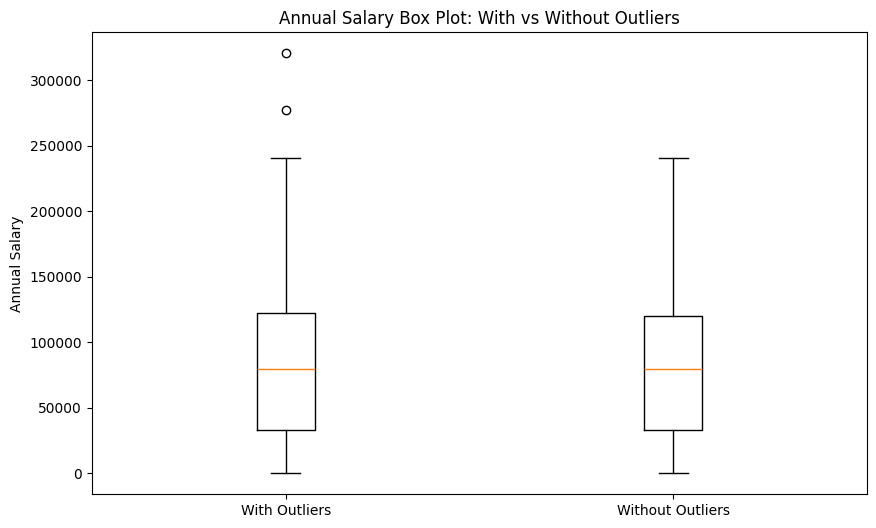

In [37]:
plt.figure(figsize = (10,6))
plt.boxplot([annual_salary, no_outliers], tick_labels=['With Outliers', 'Without Outliers'])
plt.ylabel('Annual Salary')
plt.title('Annual Salary Box Plot: With vs Without Outliers')
plt.show()

We update the `job_posting_df` by keeping `Annual_Salary` that are not outliers and replacing outlier salaries with `NaN`. This marks extreme values as missing while preserving the rest of the data for analysis.

In [38]:
job_posting_df.loc[no_outliers.index, 'Annual_Salary'] = no_outliers
job_posting_df.loc[outliers.index, 'Annual_Salary'] = np.nan

## General Research Question

Understanding the global job landscape is essential for identifying emerging opportunities, evolving skill demands, and industry-wide shifts across different regions. By analyzing job postings and employment data, we can uncover meaningful insights into how the workforce is transforming over time.

With this in mind, the group formulated the research question:

> **What are the underlying patterns and trends in the international job market?**


## EDA Question 1 - Salary and Job Fields
Job field in this case lies on their category within the `O*NET Family` categorization in the dataset. In this EDA question, the researchers aim to understand the following:
- What is the relationship between the annual salary and the job field in the dataset?
- Which job fields show the lowest and highest salary variability?
- What is the typical salary for each job field?



For this specific research question, we will be focusing on the **Annual Salary** field and the **O*NET Family** field. To make analysis easier, we will be creating a subset of the **job_posting** dataframe that only contains the necessary rows and columns and filter out any observations that do not have information about the annual salary.

In [39]:
eda_1_df = job_posting_df[['O*NET Occupation Name', 'O*NET Family', 'Annual_Salary']].dropna(subset=['Annual_Salary'], how='any')
eda_1_df.head()

,O*NET Occupation Name,O*NET Family,Annual_Salary
24,"Meeting, Convention, and Event Planners",Business and Administration,102856.0
26,Electrical Engineers,Engineering and Construction,34437.9
124,"Securities, Commodities, and Financial Service...",Business and Administration,180500.0
184,Computer Systems Engineers/Architects,Technology,54080.0
187,Reservation and Transportation Ticket Agents a...,Business and Administration,45760.0


To better understand the relationship between **Annual_Salary** and job field classifications (represented by **O\*NET Family**), we will visualize the data using a **box plot**. This allows us to observe the distribution of salaries within each job field, compare median salaries, and identify variability and outliers across different job categories.


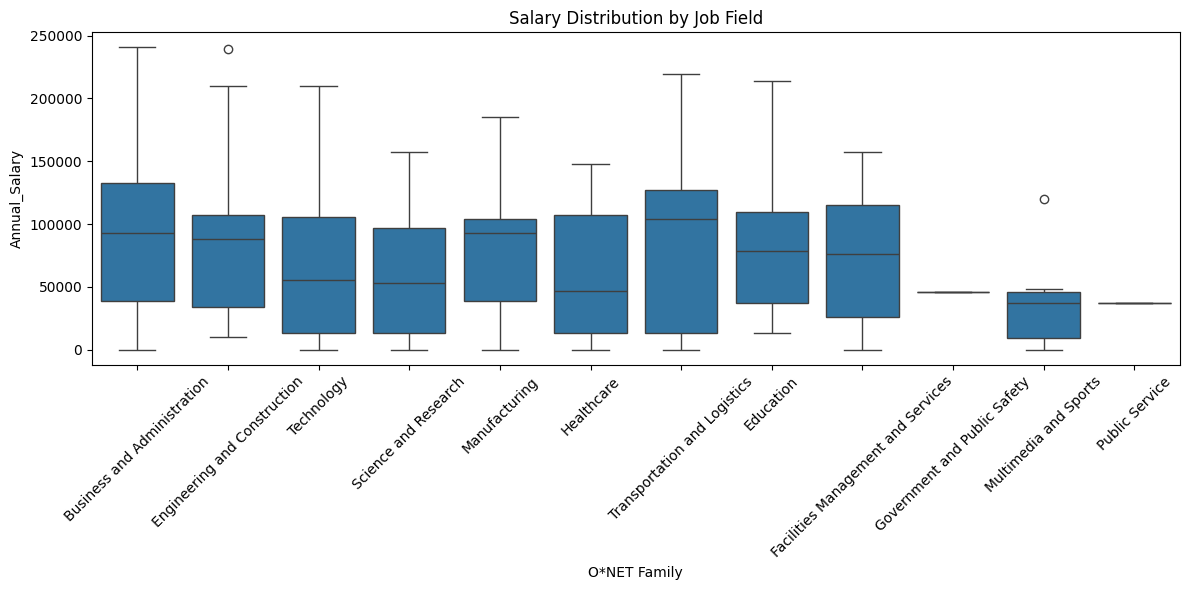

In [40]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='O*NET Family', y='Annual_Salary', data=eda_1_df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Job Field')
plt.tight_layout()
plt.show()


Based on the visualization, the following interpretations can be made:

1. **Median Salaries:**
   - Fields such as **`Transportation and Logistics`**, **`Manufacturing`**, and **`Business and Administration`** appear to have the **highest median salaries**. This suggests that jobs within these fields generally offer higher annual compensation compared to other job families.

2. **Salary Variability:**
   - The field with the **highest variability** is **`Transportation and Logistics`**, indicating a wide spread of salaries. This could be due to a mix of both **entry-level** and **high-level** positions within the same field.
   - Fields such as **`Facilities Management and Services`** and **`Public Service`** show **low salary variability**, suggesting that jobs in these fields tend to have similar pay. However, this may also be due to **limited data** for these fields, which can result in narrow distributions.
   - To further understand these patterns, the **`Seniority`** column could be used to distinguish between roles and levels within each job field.

3. **Outliers:**
   - Some fields, including **`Engineering and Construction`** and **`Multimedia and Sports`**, display **outliers** — salaries that fall far outside the typical range.
   - These outliers may indicate **high-paying specialist roles**, **executive positions**, or possibly even **data entry anomalies** that warrant further investigation.


To understand how each job field typically pays, we compute the **median annual salary** for each **O\*NET Family**. The **median** is preferred over the mean in this case because salary data often contains extreme values (e.g., executive roles) that can skew the average. 

By using the median, we get a more accurate representation of the "typical" salary within each job field.

The result is a sorted table showing the median salary per job field in descending order.


In [41]:
median_salary = eda_1_df.groupby(['O*NET Family']).agg({'Annual_Salary': ['median']})
median_salary = median_salary.sort_values(by=('Annual_Salary', 'median'), ascending=False)
median_salary

,Annual_Salary
,median
O*NET Family,
Transportation and Logistics,104000.00
Business and Administration,92500.00
Manufacturing,92500.00
Engineering and Construction,88306.80
Education,78750.00
Facilities Management and Services,76250.00
Technology,55120.00
Science and Research,53406.00


From the table above, we can observe that **`Business and Administration`** has the **highest median salary** among all job fields, indicating it generally offers more lucrative positions. On the other hand, **`Public Service`** appears to have the **lowest median salary**, suggesting that roles in this field tend to offer lower compensation compared to others.


### EDA Question 2 - Seniority and Contract Types (and Salary Relevance)
The researchers aim for this EDA question are to identify related patterns and trends within the `Seniority` and `Contract Types` variables. They will be guided by the following questions:
- What is the relationship between seniority and contract types in the dataset?
- What is the salary distribution for each combination/category of seniority and their equal contract types?
- Are certain contract types more prevalent at specific seniority levels?


For this question, we isolate the necessary columns: `Seniority`, `Contract Types`, `Annual_Salary` into a new DataFrame for convenience as well as filtering out observations that do not contain information regarding the annual salary.

In [42]:
eda_2_df = job_posting_df[['Seniority', 'Contract Types', 'Annual_Salary']].dropna(subset=['Annual_Salary'], how='any')
eda_2_df

,Seniority,Contract Types,Annual_Salary
24,Non-Managerial Position,[Full Time],102856.0
26,Non-Managerial Position,[Full Time],34437.9
124,Managerial Position,[],180500.0
184,Non-Managerial Position,"[Internship/Trainee, Internship/Trainee]",54080.0
187,Non-Managerial Position,[Remote/Flexible],45760.0
...,...,...,...
7353,Non-Managerial Position,[Full Time],113360.0
7389,Non-Managerial Position,"[Full Time, Internship/Trainee, Long Term]",45760.0
7390,Non-Managerial Position,"[Full Time, Internship/Trainee, Internship/Tra...",120000.0
7393,Managerial Position,"[Full Time, On-site]",13054.8


With this new DataFrame, we can continue by creating a relationship table for `Seniority` and `Contract Types` which we can visualize using a heat map.

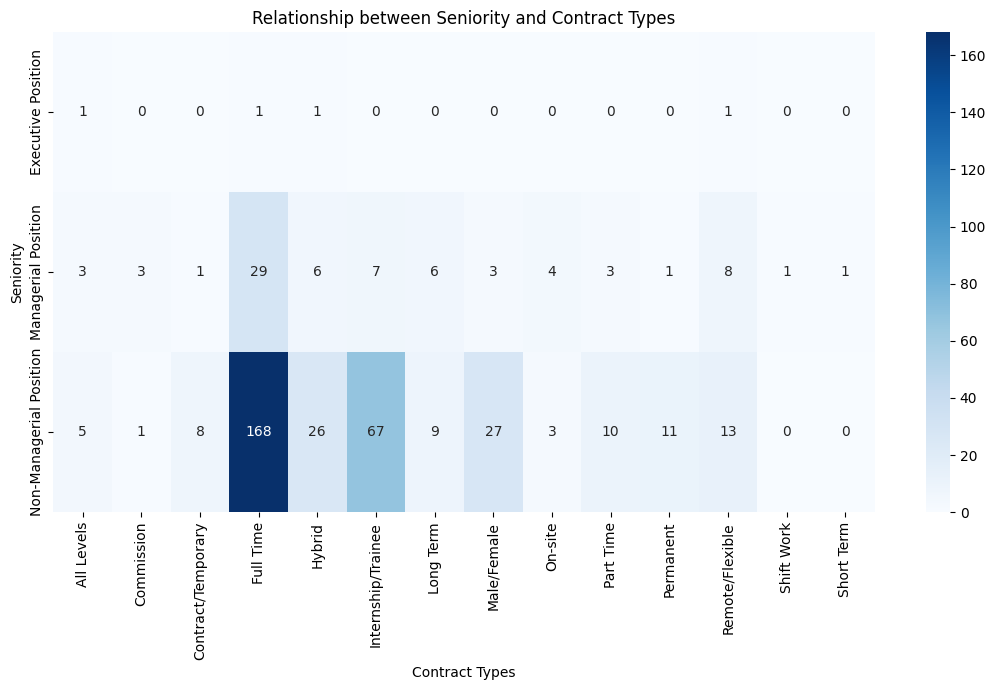

In [43]:
eda_2_df = eda_2_df.explode('Seniority')
eda_2_df = eda_2_df.explode('Contract Types')
relationship_table_eda2 = pd.crosstab(eda_2_df['Seniority'], eda_2_df['Contract Types'])
plt.figure(figsize=(11, 7))
sns.heatmap(relationship_table_eda2, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Seniority and Contract Types')
plt.xlabel('Contract Types')
plt.ylabel('Seniority')
plt.tight_layout()
plt.show()


Based on the visualization, the following interpretations can be made:

1. **Contract Type Prevalence:**
   - `Full Time` Contract Types are to be the most prevalent among every Seniority, indicating the general popularity of `Full Time` contracts among employment listings.
   - `Internship\Trainee` Contract Types are predominant among the `Non-Managerial Position` Seniority only coming 2nd to `Full Time` Contract Types while. This indicates that `Non-Managerial Position` Seniority recieve the bulk of low experienced labor employment.

2. **Seniority Variability:**
   - The `Seniority` with the greatest amount of listings are `Non-Managerial Position`, followed by `Managerial Position`, and then lastly `Executive Position`. This shows the general demand of Seniority, with `Non-Managerial Position` having the most demand among the listings.


To visualize the salary distribution among the combinations of `Seniority` and `Contract Types`, we will utilize a boxplot separating each `Seniority` into their own `Contract Types` and `Annual_Salary` distributions.

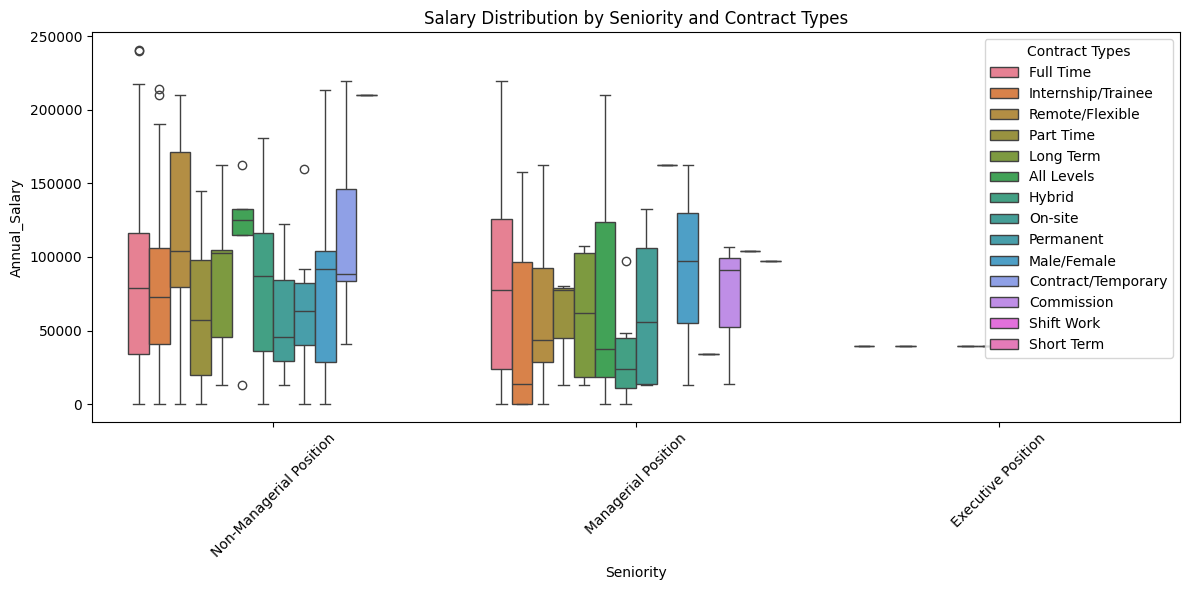

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=eda_2_df, x='Seniority', y='Annual_Salary', hue='Contract Types')
plt.title('Salary Distribution by Seniority and Contract Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Based on the visualization, the following interpretations can be made:

1. **Non-Managerial and Managerial Comparison:**
   - Surprisingly, the boxplot generally shows higher median annual salaries in the `Non Managerial Position` listings compared to the `Managerial Position` listings. There could be numerous reasons for this, one such reason could be that certain specialized senior roles are classified as `Non-Managerial Position`. Or it could mean that the employment listings for `Managerial Position` show lower salaries in the job listings that are inaccurate to the true salaries listen in the contracts.
   - The annual salaries of the `Managerial Position` listings vary less than the `Non-Managerial Position`, possibly indicating employers have a set standard for `Managerial Position` salaries.

2. **Executive Position:**
   - The `Executive Position` show very little variability due to the small amount of `Executive Position` listings available in the dataset.
   - Very little information can be collected due to insufficient sample sizes for the `Executive Position`.

### EDA Question 3 - Locations and Skills
Skills in this case lies on their category within the `Keywords` categorization in the dataset. In this EDA question, the researchers aim to understand the following:
- What is the relationship between the skills required by companies that are outsourcing to specific locations?
- What are the prevalent skill categories that exist for each location?
- Which locations have the highest demand for specific skills?

To answer this question we need to combine the job posting keywords with their corresponding countr information to prepare for skill-based analysis. First, it merges the `Keywords` column from the job postings with the `country` column from the location data. Then, it renames the `Keywords` column to `skills` for clarity. Finally, it uses the `.explode()` function to break down each list of skills into individual rows, so that each skill-country pair occupies its own row. This makes it easier to analyze how specific skills are distributed across different countries.

In [45]:
country_skills = pd.concat([job_posting_df['Keywords'], locations_df['country']], axis=1)
country_skills = country_skills.rename(columns={'Keywords': 'skills'})
country_skills = country_skills.explode('skills')
skill_counts = country_skills.groupby(['country', 'skills']).size().reset_index(name='count')

This section selects the most in-demand skill for each country by sorting and grouping the data, then keeping the top skill per country.

In [46]:
top_skills_by_country = (
    skill_counts.sort_values(['country', 'count'], ascending=[True, False])
                .groupby('country')
                .head(1)
                .reset_index(drop=True)
)

top_skills_by_country

,country,skills,count
0,Argentina,Programming Languages,7
1,Australia,Programming Languages,35
2,Austria,ERP & Business Software,40
3,Belgium,ERP & Business Software,32
4,Brazil,Programming Languages,187
5,Bulgaria,ERP & Business Software,2
6,Canada,Marketing & Social Media Tools,14
7,Chad,DevOps & CI/CD,4
8,Chile,Programming Languages,1
9,China,ERP & Business Software,52


This section counts how many countries have each skill as their top demand. It groups top_skills_by_country by skill, counts the number of countries per skill, and sorts the result in descending order.

In [47]:
skill_top_country_counts = top_skills_by_country.groupby('skills').size().reset_index(name='num_countries')
skill_top_country_counts = skill_top_country_counts.sort_values(by='num_countries', ascending=False)
skill_top_country_counts

,skills,num_countries
2,ERP & Business Software,25
6,Programming Languages,19
4,Marketing & Social Media Tools,4
5,Other and Broader Skills,4
0,Analytics & BI,2
1,DevOps & CI/CD,1
3,Frameworks & Libraries,1


To understand how prominent each skill is within a country, we first calculated the total number of skill mentions per country. We then merged this with the individual skill counts and computed the skill ratio, which represents the percentage share of each skill in that country’s overall skill demand. This helps identify which skills are most dominant within each country's job market.

In [48]:
total_skills_per_country = skill_counts.groupby('country')['count'].sum().reset_index(name='total_skills')
total_skills_per_country = total_skills_per_country.sort_values(by='total_skills', ascending=False)

country_skill_ratio = skill_counts.merge(total_skills_per_country, on='country')
country_skill_ratio['skill_ratio'] = country_skill_ratio['count'] / country_skill_ratio['total_skills'] * 100

We also calculated the average skill ratio for each skill across all countries to see how dominant a skill is globally. We also computed the total count of each skill to show how frequently it appears overall. Merging these two metrics provides a clearer picture of both the relative importance and global demand for each skill.

In [49]:
avg_skill_ratio = country_skill_ratio.groupby('skills')['skill_ratio'].mean().reset_index(name='avg_skill')
total_skill_counts = country_skill_ratio.groupby('skills')['count'].sum().reset_index(name='total_count')
avg_skill_ratio = avg_skill_ratio.merge(total_skill_counts, on='skills')
avg_skill_ratio = avg_skill_ratio.sort_values(by='avg_skill', ascending=False)

avg_skill_ratio

,skills,avg_skill,total_count
7,ERP & Business Software,32.035308,4757
15,Programming Languages,30.386993,5207
14,Other and Broader Skills,17.722781,1702
10,Marketing & Social Media Tools,11.137011,877
11,Methodologies,8.943668,1422
0,Analytics & BI,8.383129,573
8,Frameworks & Libraries,6.308345,880
6,DevOps & CI/CD,4.209012,606
17,Tools & Platforms,3.776549,504
3,Cloud Services,3.266781,584


To identify which countries lead in specific skills, we used two approaches. First, we filtered for skills with at least 250 mentions and selected the top country per skill based on the highest skill ratio — showing where a skill is most dominant relative to others.

In [50]:
MIN_COUNT = 250

top_countries_per_skill = (
    country_skill_ratio[country_skill_ratio['count'] >= MIN_COUNT]  
    .sort_values(['skills', 'skill_ratio'], ascending=[True, False]) 
    .groupby('skills')
    .head(1)
    .reset_index(drop=True)
    .sort_values(by='skill_ratio', ascending=False)  
)

top_countries_per_skill

,country,skills,count,total_skills,skill_ratio
2,Germany,ERP & Business Software,871,2262,38.505747
7,India,Programming Languages,1047,3354,31.216458
5,United States,Methodologies,528,5758,9.169851
6,United States,Other and Broader Skills,526,5758,9.135116
3,India,Frameworks & Libraries,306,3354,9.123435
1,India,DevOps & CI/CD,286,3354,8.527132
0,India,Cloud Services,259,3354,7.722123
4,United States,Marketing & Social Media Tools,316,5758,5.488017


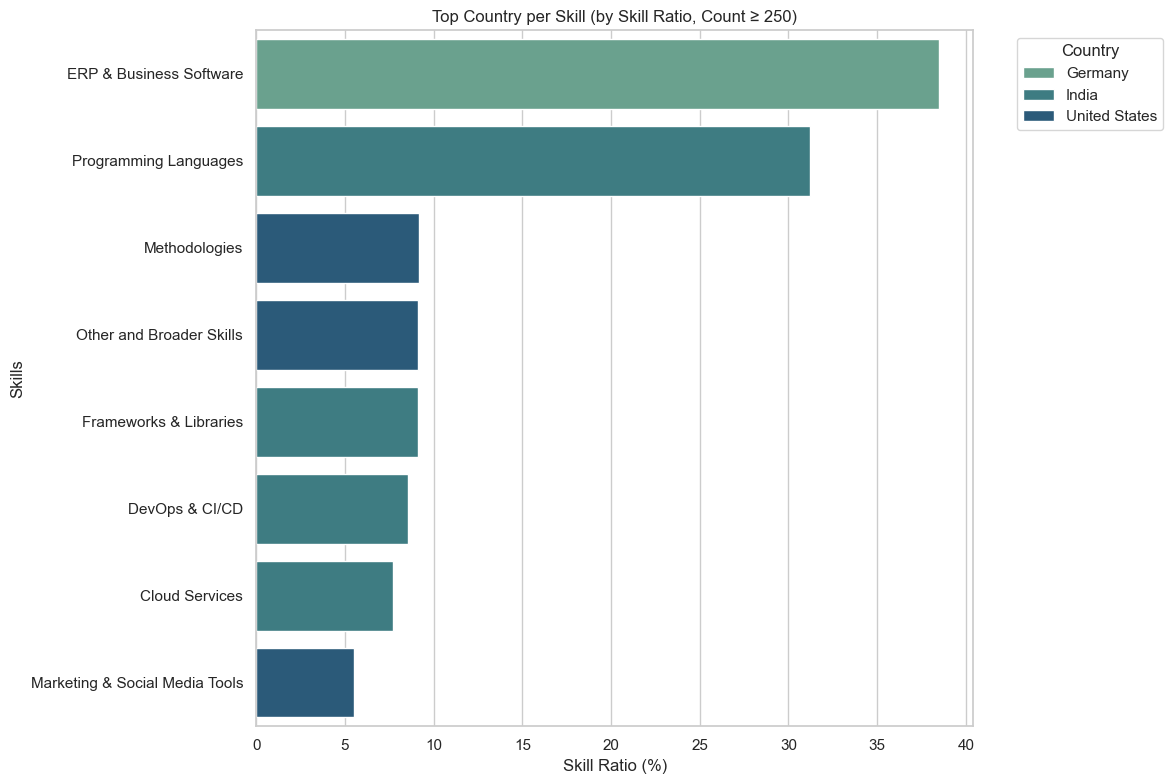

In [51]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(
    data=top_countries_per_skill,
    x='skill_ratio', 
    y='skills', 
    hue='country', 
    dodge=False, 
    palette='crest'
)

plt.xlabel("Skill Ratio (%)")
plt.ylabel("Skills")
plt.title("Top Country per Skill (by Skill Ratio, Count ≥ 250)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We also selected the top country per skill based on raw count, highlighting where each skill appears most frequently overall. Both methods help reveal patterns of specialization and demand across countries.

In [52]:
top_countries_per_skill = (
    country_skill_ratio
    .sort_values(['skills', 'count'], ascending=[True, False])  
    .groupby('skills')
    .head(1)                                                     
    .reset_index(drop=True)
    .sort_values(by='count', ascending=False)                    
)

top_countries_per_skill

,country,skills,count,total_skills,skill_ratio
7,United States,ERP & Business Software,1587,5758,27.561653
15,United States,Programming Languages,1565,5758,27.179576
11,United States,Methodologies,528,5758,9.169851
14,United States,Other and Broader Skills,526,5758,9.135116
10,United States,Marketing & Social Media Tools,316,5758,5.488017
8,India,Frameworks & Libraries,306,3354,9.123435
6,India,DevOps & CI/CD,286,3354,8.527132
3,India,Cloud Services,259,3354,7.722123
1,United States,CMS & Web Platforms,163,5758,2.830844
17,United States,Tools & Platforms,151,5758,2.622438


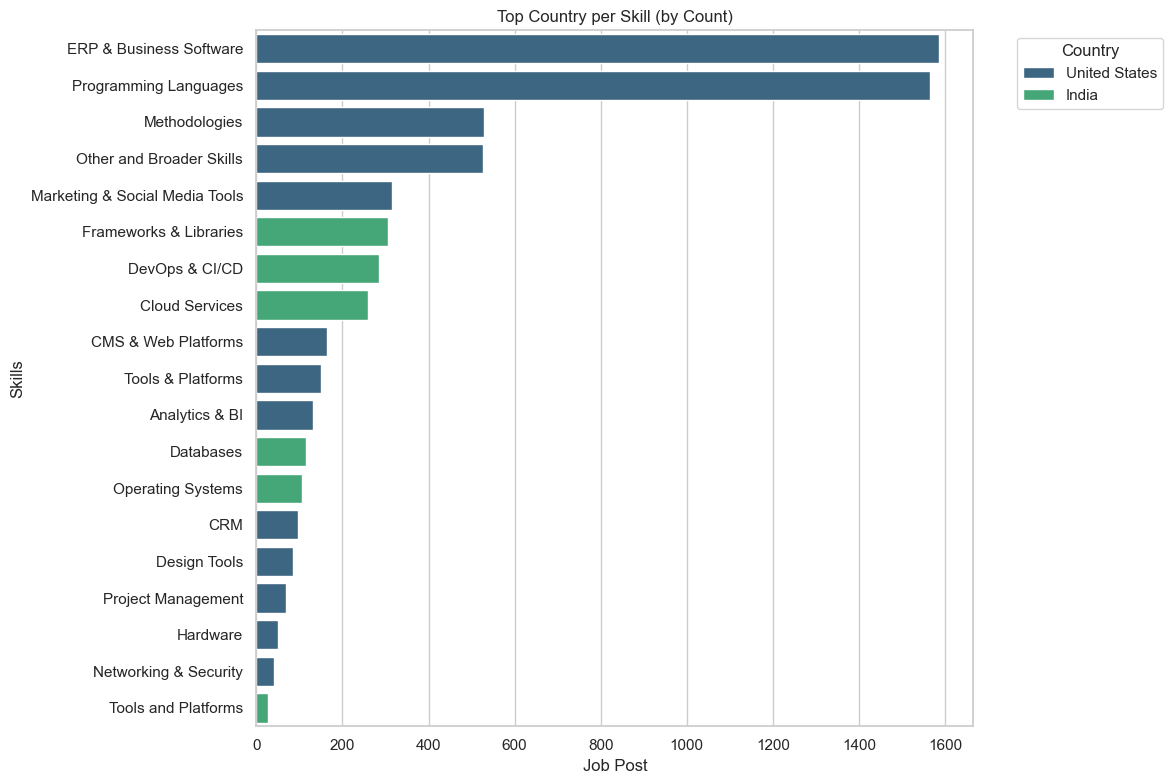

In [53]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

sns.barplot(
    data=top_countries_per_skill, 
    x='count', 
    y='skills', 
    hue='country', 
    dodge=False,
    palette='viridis'
)

plt.xlabel("Job Post")
plt.ylabel("Skills")
plt.title("Top Country per Skill (by Count)")
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Based on the insights, **ERP & Business Software** has the highest global demand with a **32.04%** average share and **4,757 job posts**, while Tools and Platforms is the lowest at **0.82%** with **76 job posts**. The U.S. leads in total ERP job posts **(1,587, 27.56%)**, but Germany has the highest skill ratio at **38.51%** among countries with at least 250 ERP job posts.

## Data Mining

### Data Mining Technique

**TO-DO:** Select and justify a data mining technique (rule mining, clustering, or collaborative filtering)

### Data Pre-processing for Data Mining
**TO-DO:** Pre-process the data according to the selected Data Mining Technique

### Algorithm Implementation
**TO-DO:** Implement the necessary algorithms

### Analysis of Results
**TO-DO:** Visualize the results and summarize insights

## Statistical Inference

### Statistical Testing 1

**TO-DO:** State both hypotheses clearly – Include the research question, the null hypothesis

**TO-DO:** Justify the statistical test used – Name the test, explain why it's appropriate for your data, and list the assumptions (e.g., normality, independence).

**TO-DO:** Explain preprocessing steps done before the test – Mention any cleaning, scaling, binning, or other data preparation done before computing the p-value.

**TO-DO:** Report test results and interpretation – Include the p-value, significance level, and a clear conclusion on whether H₀ is rejected or not, and what it means in context.

### Statistical Testing 2

**TO-DO:** State both hypotheses clearly – Include the research question, the null hypothesis

**TO-DO:** Justify the statistical test used – Name the test, explain why it's appropriate for your data, and list the assumptions (e.g., normality, independence).

**TO-DO:** Explain preprocessing steps done before the test – Mention any cleaning, scaling, binning, or other data preparation done before computing the p-value.

### Statistical Testing 3

**TO-DO:** State both hypotheses clearly – Include the research question, the null hypothesis

**TO-DO:** Justify the statistical test used – Name the test, explain why it's appropriate for your data, and list the assumptions (e.g., normality, independence).

**TO-DO:** Explain preprocessing steps done before the test – Mention any cleaning, scaling, binning, or other data preparation done before computing the p-value.

**TO-DO:** Report test results and interpretation – Include the p-value, significance level, and a clear conclusion on whether H₀ is rejected or not, and what it means in context.

**TO-DO:** Report test results and interpretation – Include the p-value, significance level, and a clear conclusion on whether H₀ is rejected or not, and what it means in context.

## Insights and Conclusions

**TO-DO:** Restate the research question clearly

**TO-DO:** Give a high-level recap of the methods you used to analyze the data 

**TO-DO:** Explain what you discovered and back each insight up with specific evidence (from data mining + statistical inference)

**TO-DO:** Wrap up by clearly stating what the data says in response to your question.


**TO-DO:** Mention if there are limitations (e.g., small sample size, biases) or ideas for expanding the study.

## Statement on Generative AI Assistance

During the preparation of this work, the author(s) used **ChatGPT by OpenAI**, **Deepseek by High-Flyer**, and **Claude by Anthropic** for the following purposes:

- To assist in **generating an initial mapping structure** for categorizing data fields such as contract types, job keywords, and job family groupings.
- To help **refactor and streamline code** for consistency and readability across mapping functions.
- To polish the **explanatory text and markdown documentation** used in the notebook.


After using this tool, the author(s) **reviewed, validated, and edited all generated content**. In particular, the AI-assisted mapping suggestions were carefully **reviewed and verified by a group member** to ensure the accuracy and consistency of category assignments across the dataset. The author(s) take full responsibility for the final content of the publication.
